<a href="https://colab.research.google.com/github/MarioBolanos/Modelado2020_2/blob/master/Metodo_de_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implementación simple del método de Euler




## Introducción


#Métodos numéricos para ecuaciones diferenciales ordinarias.

Muchas ecuaciones diferenciales no pueden resolverse mediante el cálculo simbólico ("análisis"). Sin embargo, para fines prácticos, como en ingeniería, una aproximación numérica a la solución a menudo es suficiente. 

Las ecuaciones diferenciales constituyen una de las herramientas matemáticas más poderosas para comprender y predecir el comportamiento de los sistemas dinámicos en la naturaleza, la ingeniería y la sociedad. Un sistema dinámico es un sistema con algún estado, generalmente expresado por un conjunto de variables, que evoluciona en el tiempo. Por ejemplo, un péndulo oscilante, la propagación de una enfermedad y el clima son ejemplos de sistemas dinámicos.

En todo tipo de ciencias naturales, encontramos ecuaciones diferenciales. Estas ecuaciones pueden ser bastante complicadas de resolver analíticamente y la mayoría de las veces no existe una solución analítica.

El propósito de este cuaderno es simplemente demostrar __cómo__ se puede resolver una EDO. No nos centraremos en la teoría detrás del método de Euler, nos centraremos únicamente en la __implementación__ de nuestro solucionador de ODE. 

Los modelos más toscos para modelar el crecimiento bacteriano son una excelente opción para demostrar el método de Euler, ya que la ecuación diferencial que rige este crecimiento es bastante simple.

## Teoría

### Crecimiento de la población
Antes de comenzar a programar, daremos una breve introducción al crecimiento bacteriano. Las bacterias se reproducen por fisión binaria. Este es un proceso en el que una sola célula bacteriana se divide en dos, creando dos células bacterianas. Las dos nuevas células bacterianas pueden volver a dividirse en dos, creando así cuatro células bacterianas. En realidad, una sola célula bacteriana solo puede dividirse en dos una cierta cantidad de veces, pero en nuestro proyecto modelamos nuestra tasa de crecimiento como si este no fuera el caso.

Entonces podemos escribir nuestra ecuación diferencial como

\begin{equation}
\frac{dy}{dt} = ky(t),\tag{1}
\end{equation}

donde $ y (t) $ es la población $ y $ en el momento $ t $, y $ k $ es una constante de proporcionalidad. Si usamos días como unidad de tiempo y asumimos que el tamaño de la población en $ t = 1 $ es el doble del tamaño de la población en $ t = 0 $

\begin{equation}
y(1) = 2y(0) \tag{2},
\end{equation}

podemos resolver la ecuación diferencial analíticamente. Combinando las ecuaciones $ (1) $ y $ (2) $, obtenemos

\begin{equation}
y(t) = \mathrm{e}^{kt} = \mathrm{e}^{\mathrm{ln}(2)t} = 2^{t}. \tag{3}
\end{equation}

La ecuación $ (3) $ describe completamente el tamaño de la población en el momento $ t $.

### Método de Euler
Este párrafo intentará transmitir la mínima teoría sobre el método de Euler. Sin embargo, estos párrafos deberían ser suficientes para la implementación.

En primer lugar, al resolver ecuaciones diferenciales numéricamente, necesitamos __discretizar__ nuestra variable de tiempo $ t $. Por tanto,$ t $ ya no es una variable continua, en su lugar escribimos

$$
t_n = t_0 + nh, \quad \mathrm{with} \quad n = 0, 1, 2,..., N,
$$

donde $ t_0 $ es el valor de tiempo donde conocemos el tamaño de nuestra __población inicial__, y $ h $ es el tamaño entre valores de tiempo discretos adyacentes. La relación entre $ N $ y $ h $ está dada por

$$
h = \frac{t_N - t_0}{N},
$$

donde $ N $ es el número de puntos de tiempo discretos que tenemos en nuestra simulación, mientras que $ t_N $ y denotan el valor de tiempo más grande que tenemos en nuestra simulación.

En general, nuestra aproximación numérica será mejor si elegimos $ h $ pequeños. Observe que a medida que disminuye el tamaño de $ h $, aumenta el número de valores de tiempo discretos entre $ t_0 $ y $ t_N $. Pagamos por el aumento de la precisión de nivel aumentando el número de cálculos necesarios, aumentando así el tiempo de ejecución de nuestro programa.

Una ecuación diferencial de primer orden sin dependencia explícita del tiempo se puede escribir en la forma más general

\begin{equation}
\frac{dy}{dt} = g(y),
\tag{4}
\end{equation}

donde $ g (y) $ es la ecuación que gobierna la tasa de cambio de nuestra función $ y (t) $. En nuestro caso, $ g (y) = ky $.

Si conocemos el tamaño de la población en $ t_0 $ y denotamos este valor como $ y_0 $, podemos usar el método de Euler para encontrar una aproximación del tamaño de la población en $ t_1 = t_0 + h $. El tamaño de la población en $ t_1 $ se denota como $ y_1 $. Esta aproximación se puede calcular mediante la fórmula

$$
y_1 = y_0 + hg(y_0).
$$

Ahora, para encontrar el tamaño de la población $ y_2 $ en $ t_2 = t_1 + h = t_0 + 2h $, usamos la misma fórmula, pero con $ y_1 $ en lugar de $ y_0 $

$$
y_2 = y_1 + h g(y_1).
$$

La forma más general del método de Euler se escribe como

$$
y_{n+1} = y_n + h g(y_n),
\tag{5}
$$
donde tenemos la condición inicial de que
$$
y(t_0) = y_0.
$$

Ahora podemos implementar el método de Euler en Python y comparar nuestros resultados numéricos con la solución analítica dada en la ecuación $ (3) $.

## Implementación

In [4]:
#importar librerias

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def euler_sig(yn,h,f):
  y_next=yn+h*f(yn)
  return y_next

def euler (y0,h,fun,t_ini,t_fin):
  N=int((t_fin-t_ini)/h)
  t=np.linspace(t_ini,t_fin,N+1)

  y=np.zeros(N+1)
  y[0]=y0

  for i in range (0,N):
    y[i+1]=euler_sig(y[i],h,fun)

  return t,y



el error del método para un h= 0.001 es de 2.455833698416086


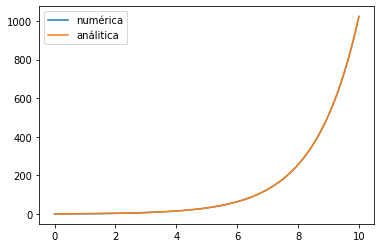

In [6]:
def g(y):
  crecimiento=np.log(2)*y
  return crecimiento

# Valores de variables
h=0.001
t_ini=0
t_fin=10
y_ini=1

#Sistema numérico
t,y=euler(y_ini,h,g,t_ini,t_fin)
plt.plot(t,y, label='numérica')

#Sistema análitico 
plt.plot(t,np.power(2,t), label='análitica')

plt.legend()
plt

last_num=y[-1]
last_an=np.power(2,t[-1])

print('el error del método para un h= {} es de {}'.format(h,(last_an-last_num)))

Ahora que tenemos nuestras funciones definidas, podemos simular la población bacteriana. Solo necesitamos definir nuestro RHS (lado derecho) de nuestra ecuación diferencial, que en la parte de la teoría denotamos como $ g (y) $.

Vemos que a nuestro modelo le va bastante bien con un tamaño de paso $ h = 0.0
1 $, ya que solo se desvía de la solución analítica en 24 células bacterianas, o 2,4%. Al elegir un $ h $ más pequeño, podríamos aumentar la precisión de nuestro resultado. Por ejemplo, eligiendo $ h = 0.001 $, solo obtendríamos una desviación de 2.4 células bacterianas, o 0.24%.

El lector podría preguntarse por qué querríamos usar el método de Euler en este caso, ya que tenemos una solución analítica perfectamente fina. Esta ecuación diferencial tiene una solución analítica, sin embargo, este no es siempre el caso. Solo elegimos este ejemplo porque podemos comparar nuestros resultados numéricos con la respuesta correcta, y así validar nuestro procedimiento. Cambiar nuestra ecuación inicial para el crecimiento, ecuación $ (5) $, a algo llamado modelo de crecimiento logístico en el formulario

\begin{equation}
\frac{dy}{dt} = ky(1 - \frac{y}{m}),
\tag{6}
\end{equation}

donde $ m $ es una constante, no podemos resolver esta ecuación analíticamente. Sin embargo, ¡todavía podemos usar el método de Euler!

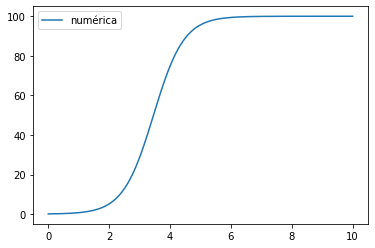

In [9]:
def r(y):
  k=2
  m=100
  crecimiento=k*y*(1-y/m)
  return crecimiento

# Valores de variables
h=0.001
t_ini=0
t_fin=10
y_ini=0.1

#Sistema numérico
t,y=euler(y_ini,h,r,t_ini,t_fin)
plt.plot(t,y, label='numérica')

plt.legend()


Este gráfico ilustra perfectamente la esencia del método de Euler y las soluciones numéricas de las EDO en general. Aunque no tenemos una solución analítica para validar nuestros resultados, aún podemos extraer información importante de nuestros resultados numéricos y validar los resultados a través de argumentos físicos. La constante $ m $ en $ (6) $ se llama capacidad de carga, el nombre se manifiesta en nuestra gráfica, ya que observamos que la población aumenta exponencialmente los primeros cinco días, pero luego parece converger hacia 100 bacterias después de 8 días. . Físicamente, una posible explicación podría ser que nuestro sistema solo tiene los recursos para mantener una población de 100 bacterias, y que más bacterias morirían.



## Conclusión
Aunque el método de Euler es muy simple de implementar, sigue siendo una herramienta poderosa para resolver EDO. En este cuaderno hemos utilizado el método de Euler para resolver la ecuación diferencial que gobierna el crecimiento de la población en una colonia bacteriana, pero la implementación también se puede utilizar para resolver cualquier EDO sin dependencia temporal explícita. 

**Ejemplo Ley de enfriamiento de Newton:**

Esta ley describe como un objeto con temperatura inicial de $T_{t=0}=T_0$ se enfria en un ambiente de temperatura $T_R$

In [10]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def euler( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*derivadas(ti,xi,params)
      ti = ti + h
    return t, x   

Ex 1. Comparación de métodos
Dada la ecuación diferencial:

x˙=ax 

Siendo  a∈R  una constante cualquiera. Grafique la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método RK4.

Varíe el paso de integración  h  a fin de observar cómo varía la precisión de los resultados numéricos a medida que éste se hace más pequeño.

In [12]:
def sistema_1(t, x, a):
    x_dot = a*x
    return x_dot

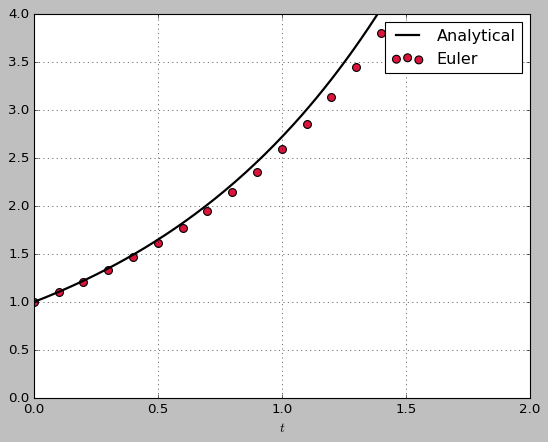

In [14]:
a = 1
h = 0.1
tini = 0
tfin = 10
x0 = 1
r=5

t = np.linspace(0,10,1001)
x = x0*np.exp(a*t)

t1,x1 = euler( sistema_1, h, tini, tfin, x0, a )
#t2,x2 = rk4( sistema_1, h, tini, tfin, x0, a )


plt.figure()
# gráfica de analítica:
plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
#plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)

plt.xlim([0, 2])
plt.ylim([-0, 4])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()